## Compute and parse metrics

In [1]:
!pip install radon

     |████████████████████████████████| 61kB 3.2MB/s 


In [2]:
!git clone https://github.com/almaan/stereoscope.git
!git clone https://github.com/YosefLab/scvi-tools.git

Cloning into 'stereoscope'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (288/288), done.
remote: Compressing objects: 100% (211/211), done.
remote: Total 596 (delta 156), reused 194 (delta 74), pack-reused 308
Receiving objects: 100% (596/596), 57.61 MiB | 33.73 MiB/s, done.
Resolving deltas: 100% (309/309), done.
Cloning into 'scvi-tools'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (370/370), done.
remote: Compressing objects: 100% (259/259), done.
remote: Total 24193 (delta 219), reused 220 (delta 104), pack-reused 23823
Receiving objects: 100% (24193/24193), 148.33 MiB | 29.92 MiB/s, done.
Resolving deltas: 100% (17597/17597), done.


In [3]:
!rm stereoscope/stsc/look.py

In [4]:
import radon
import json
import re


In [5]:
!radon cc stereoscope/stsc/ -s -a  > orig_cc.txt
!radon hal stereoscope/stsc/  > orig_hal.txt
!radon raw stereoscope/stsc/  > orig_raw.txt

In [6]:
!radon cc scvi-tools/scvi/external/stereoscope/ -s -a  > scvi_cc.txt
!radon hal scvi-tools/scvi/external/stereoscope/  > scvi_hal.txt
!radon raw scvi-tools/scvi/external/stereoscope/  > scvi_raw.txt

In [7]:
with open("orig_raw.txt") as f:
  orig_total_sloc = 0
  for line in f:
    if ':' in line:
      key, value = line.split(':')
      value = ' '.join(value.split())
      if key == "    SLOC":
        orig_total_sloc += int(value)

with open("scvi_raw.txt") as f:
  scvi_total_sloc = 0
  for line in f:
    if ':' in line:
      key, value = line.split(':')
      value = ' '.join(value.split())
      if key == "    SLOC":
        scvi_total_sloc += int(value)

In [8]:
with open("orig_hal.txt") as f:
  orig_time = 0
  orig_bugs = 0
  for line in f:
    key, value = line.split(':')
    value = ' '.join(value.split())
    if key == "    time":
      orig_time += float(value)
    if key == "    bugs":
      orig_bugs += float(value)
with open("scvi_hal.txt") as f:
  scvi_time = 0
  scvi_bugs = 0
  for line in f:
    key, value = line.split(':')
    value = ' '.join(value.split())
    if key == "    time":
      scvi_time += float(value)
    if key == "    bugs":
      scvi_bugs += float(value)


In [9]:
with open('orig_cc.txt') as f:
    for line in f:
        pass
    orig_avg_complexity = line
with open('scvi_cc.txt') as f:
    for line in f:
        pass
    scvi_avg_complexity = line

## Average complexity

In [10]:
print ("Original Stereoscope Implementation", orig_avg_complexity)
print ("Scvi-tools Implementation", scvi_avg_complexity)

Original Stereoscope Implementation Average complexity: A (2.875)

Scvi-tools Implementation Average complexity: A (1.4230769230769231)



## Sum of time

In [11]:
print("Sum of time in original stereoscope implementation:",orig_time)
print("Sum of time in scvi-tools implementation:",scvi_time)


Sum of time in original stereoscope implementation: 800.0500377165816
Sum of time in scvi-tools implementation: 54.3024615601502


## Sum of bugs

In [12]:
print("Sum of bugs in original stereoscope implementation:",orig_bugs)
print("Sum of bugs in scvi-tools implementation:",scvi_bugs)

Sum of bugs in original stereoscope implementation: 0.7669894669699762
Sum of bugs in scvi-tools implementation: 0.08709522640708889


## Source lines of code

In [13]:
print ("Sum of SLOC in original stereoscope implementation:", orig_total_sloc)
print ("Sum of SLOC in scvi-tools implementation:", scvi_total_sloc)

Sum of SLOC in original stereoscope implementation: 1400
Sum of SLOC in scvi-tools implementation: 291


## Plot

In [63]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["savefig.transparent"] = True

sns.set_theme(style="whitegrid")

df = pd.DataFrame(index=["scvi-tools", "original"], columns=["Complexity", "Halstead Time", "Halstead Bugs", "Source Lines"])
df.loc["scvi-tools", "Complexity"] = float(scvi_avg_complexity.split("(")[1].split(")")[0])
df.loc["original", "Complexity"] = float(orig_avg_complexity.split("(")[1].split(")")[0])
df.loc["scvi-tools", "Halstead Time"] = scvi_time
df.loc["original", "Halstead Time"] = orig_time
df.loc["scvi-tools", "Halstead Bugs"] = scvi_bugs
df.loc["original", "Halstead Bugs"] = orig_bugs
df.loc["scvi-tools", "Source Lines"] = scvi_total_sloc
df.loc["original", "Source Lines"] = orig_total_sloc
df["Implementation"] = df.index.to_list()

In [64]:
df

,Complexity,Halstead Time,Halstead Bugs,Source Lines,Implementation
scvi-tools,1.42308,54.3025,0.0870952,291,scvi-tools
original,2.875,800.05,0.766989,1400,original


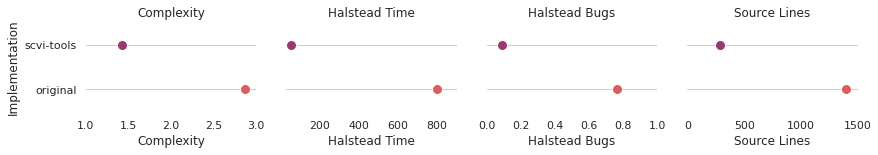

In [65]:
# Make the PairGrid
g = sns.PairGrid(df,
                 x_vars=["Complexity", "Halstead Time", "Halstead Bugs", "Source Lines"],
                 y_vars=["Implementation"],
                 height=2, aspect=1.5)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
# g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# # Use semantically meaningful titles for the columns
titles = df.columns
xlims = [(1, 3), (30, 900), (0, 1), (0, 1500)]

for ax, title, xlim in zip(g.axes.flat, titles, xlims):

    # Set a different title for each axes
    ax.set(title=title)

    ax.set_xlim(xlim)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.savefig("code_stats.pdf", bbox_inches="tight")